# **DAV Project --- Results Display**

In this notebook, the results showcased in the main paper are loaded from the TXT files generated in the ```generate_results.ipynb``` notebook. Then, the results are displayed.

**Note:** Since the project code was written on a virtual machine terminal, which does not allow displaying plots, this notebook solely displays the results given in TXT files. To generate the results, please firstly refer to the provided ```generate_results.ipynb``` notebook.

In [1]:
# imports
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

## **Hyperparameters Tuning**

In this section, we display the results of the hyperparameter tuning procedure.

First, let us display the accuracies across all iterations, for all (k, $\alpha$) combinations. Let us copy the results from the ```combination_accuracies.txt``` file into the following dict:

In [ ]:
combinations_accuracies = {
  (2, 0.0): [0.806, 0.744, 0.464, 0.824, 0.47, 0.754, 0.908, 0.492, 0.924, 0.812],
  (2, 0.2): [0.806, 0.888, 0.734, 0.822, 0.464, 0.472, 0.82, 0.908, 0.914, 0.858],
  (2, 0.4): [0.806, 0.566, 0.866, 0.896, 0.464, 0.598, 0.922, 0.908, 0.888, 0.594],
  (2, 0.6): [0.806, 0.74, 0.51, 0.796, 0.89, 0.868, 0.828, 0.856, 0.916, 0.896],
  (2, 0.8): [0.806, 0.678, 0.834, 0.784, 0.866, 0.68, 0.918, 0.8, 0.692, 0.936],
  (2, 1.0): [0.806, 0.536, 0.734, 0.904, 0.744, 0.91, 0.882, 0.908, 0.922, 0.882],
  (4, 0.0): [0.806, 0.604, 0.838, 0.464, 0.65, 0.928, 0.9, 0.464, 0.918, 0.9],
  (4, 0.2): [0.806, 0.464, 0.734, 0.742, 0.924, 0.928, 0.676, 0.846, 0.938, 0.832],
  (4, 0.4): [0.806, 0.464, 0.466, 0.684, 0.78, 0.842, 0.912, 0.906, 0.842, 0.464],
  (4, 0.6): [0.806, 0.536, 0.734, 0.848, 0.848, 0.918, 0.47, 0.898, 0.922, 0.916],
  (4, 0.8): [0.806, 0.466, 0.856, 0.846, 0.852, 0.632, 0.928, 0.766, 0.926, 0.914],
  (4, 1.0): [0.806, 0.534, 0.65, 0.79, 0.814, 0.908, 0.746, 0.872, 0.536, 0.536],
  (6, 0.0): [0.806, 0.854, 0.632, 0.768, 0.464, 0.934, 0.464, 0.572, 0.908, 0.798],
  (6, 0.2): [0.806, 0.724, 0.852, 0.758, 0.602, 0.884, 0.928, 0.464, 0.864, 0.924],
  (6, 0.4): [0.806, 0.784, 0.882, 0.464, 0.826, 0.946, 0.934, 0.464, 0.92, 0.884],
  (6, 0.6): [0.806, 0.726, 0.608, 0.464, 0.512, 0.898, 0.536, 0.79, 0.464, 0.892],
  (6, 0.8): [0.806, 0.464, 0.466, 0.658, 0.864, 0.536, 0.814, 0.468, 0.748, 0.918],
  (6, 1.0): [0.806, 0.802, 0.536, 0.814, 0.464, 0.838, 0.656, 0.912, 0.852, 0.898],
  (8, 0.0): [0.806, 0.702, 0.464, 0.918, 0.464, 0.728, 0.9, 0.812, 0.922, 0.938],
  (8, 0.2): [0.806, 0.732, 0.66, 0.89, 0.464, 0.902, 0.508, 0.526, 0.712, 0.928],
  (8, 0.4): [0.806, 0.658, 0.56, 0.75, 0.796, 0.692, 0.568, 0.896, 0.682, 0.93],
  (8, 0.6): [0.806, 0.54, 0.778, 0.936, 0.464, 0.866, 0.478, 0.79, 0.768, 0.696],
  (8, 0.8): [0.806, 0.834, 0.87, 0.796, 0.94, 0.662, 0.926, 0.464, 0.926, 0.688],
  (8, 1.0): [0.806, 0.598, 0.872, 0.916, 0.892, 0.92, 0.464, 0.812, 0.848, 0.932],
  (10, 0.0): [0.806, 0.464, 0.5, 0.736, 0.82, 0.816, 0.842, 0.916, 0.932, 0.88],
  (10, 0.2): [0.806, 0.6, 0.514, 0.812, 0.922, 0.464, 0.73, 0.926, 0.532, 0.762],
  (10, 0.4): [0.806, 0.464, 0.536, 0.774, 0.764, 0.874, 0.928, 0.844, 0.918, 0.816],
  (10, 0.6): [0.806, 0.584, 0.47, 0.638, 0.93, 0.764, 0.464, 0.914, 0.72, 0.77],
  (10, 0.8): [0.806, 0.542, 0.884, 0.838, 0.858, 0.536, 0.882, 0.884, 0.906, 0.924],
  (10, 1.0): [0.806, 0.668, 0.718, 0.846, 0.464, 0.912, 0.924, 0.874, 0.464, 0.812]
}

Now, let us plot a heatmap with the accuracy in **iteration number 5** for all combinations, as discussed in the main paper:

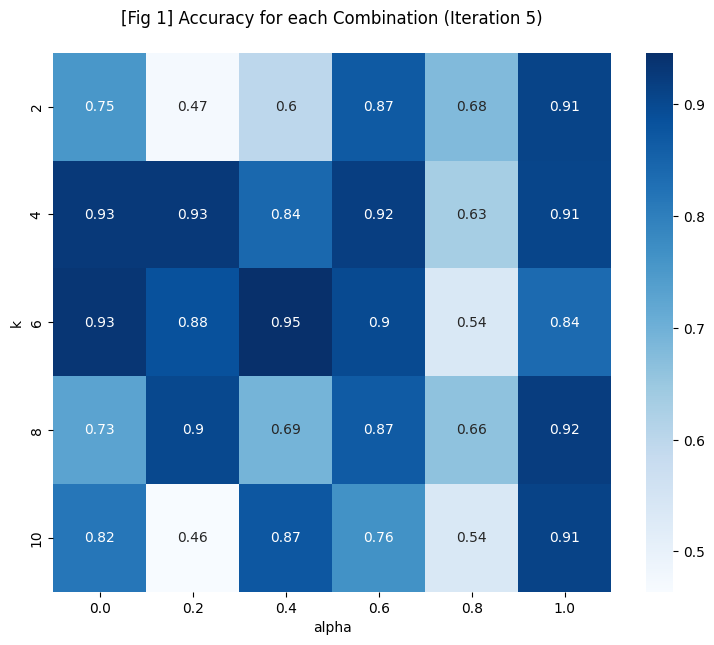

In [ ]:
k_values = [2, 4, 6, 8, 10]
alpha_values = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
combinations_accuracy_in_iter_5 = np.zeros((len(k_values), len(alpha_values)))

for i, k in enumerate(k_values):
  for j, alpha in enumerate(alpha_values):
    accuracies = combinations_accuracies[(k, alpha)]

    accuracy_in_iter_5 = accuracies[5]
    combinations_accuracy_in_iter_5[i, j] = accuracy_in_iter_5

plt.figure(figsize=(9, 7))
sns.heatmap(combinations_accuracy_in_iter_5, cmap="Blues", annot=True)
plt.title("[Fig 1] Accuracy for each Combination (Iteration 5)\n")
plt.xlabel("alpha")
plt.ylabel("k")
plt.xticks(0.5+np.arange(len(alpha_values)), alpha_values)
plt.yticks(0.5+np.arange(len(k_values)), k_values)
plt.show()

It seems that the best hyperparameter combination is k = 6, $\alpha$ = 0.4:

In [ ]:
best_k_alpha_pair = (6, 0.4)

Now, after setting the best k and $\alpha$ values, let us search for the optimal embedding dimension $D$. Let us copy the results from the ```embedding_dim_accuracies.txt``` file into the lists below:

In [ ]:
accuracies_dim_256 = [0.594, 0.824, 0.464, 0.464, 0.866, 0.864, 0.93, 0.53, 0.942, 0.936]
accuracies_dim_512 = [0.858, 0.868, 0.902, 0.834, 0.464, 0.466, 0.94, 0.478, 0.914, 0.858]
accuracies_dim_768 = [0.832, 0.464, 0.474, 0.918, 0.924, 0.878, 0.918, 0.524, 0.918, 0.768]
accuracies_dim_1024 = combinations_accuracies[best_k_alpha_pair]

Now, plot the results:

In [ ]:
embedding_dims = ["256", "512", "768", "1024"]
accuracies_per_dim = [accuracies_dim_256, accuracies_dim_512, accuracies_dim_768, accuracies_dim_1024]

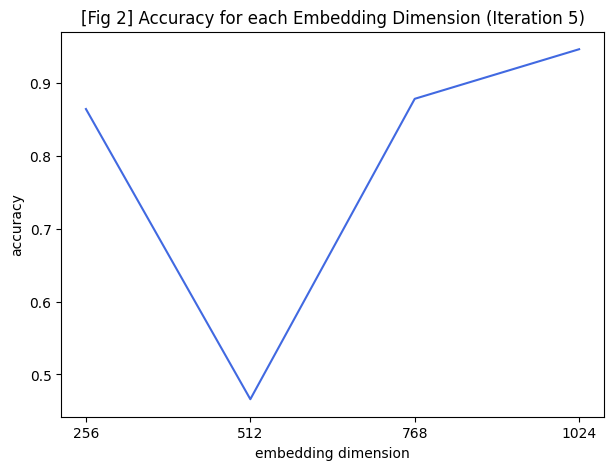

In [ ]:
iter_5_accuracy_per_dim = {}

for dim, accuracies in zip(embedding_dims, accuracies_per_dim):
  accuracy_in_iter_5 = accuracies[5]
  iter_5_accuracy_per_dim[dim] = accuracy_in_iter_5

plt.figure(figsize=(7, 5))
plt.plot(iter_5_accuracy_per_dim.keys(), iter_5_accuracy_per_dim.values(), color="royalblue")
plt.title("[Fig 2] Accuracy for each Embedding Dimension (Iteration 5)")
plt.xlabel("embedding dimension")
plt.ylabel("accuracy")
plt.show()

We can see that $D$ = 1024 is the best performing embedding dimension. Thus, we will proceed with it.

In [ ]:
cluster_uncertainty_accuracies = accuracies_dim_1024

## **Performance Analysis**

In this section, we compared our suggested sampling method with several baselines:

In [ ]:
sampling_methods = ["Cluster Uncertainty", "Random", "Entropy Uncertainty", "MinMax Uncertainty"]

### **Evaluation Metrics across all Iterations**

As mentioned in the main paper, we first evaluate the methods across all iterations, using the accuracy, TPR and TNR metrics:

#### **Accuracy**

Let us copy the accuracies from the bottom of the TXT files:

- ```performance_analysis - random.txt```

- ```performance_analysis - entropy uncertainty.txt```

- ```performance_analysis - minmax uncertainty.txt```

And paste them into the following lists, respectively:

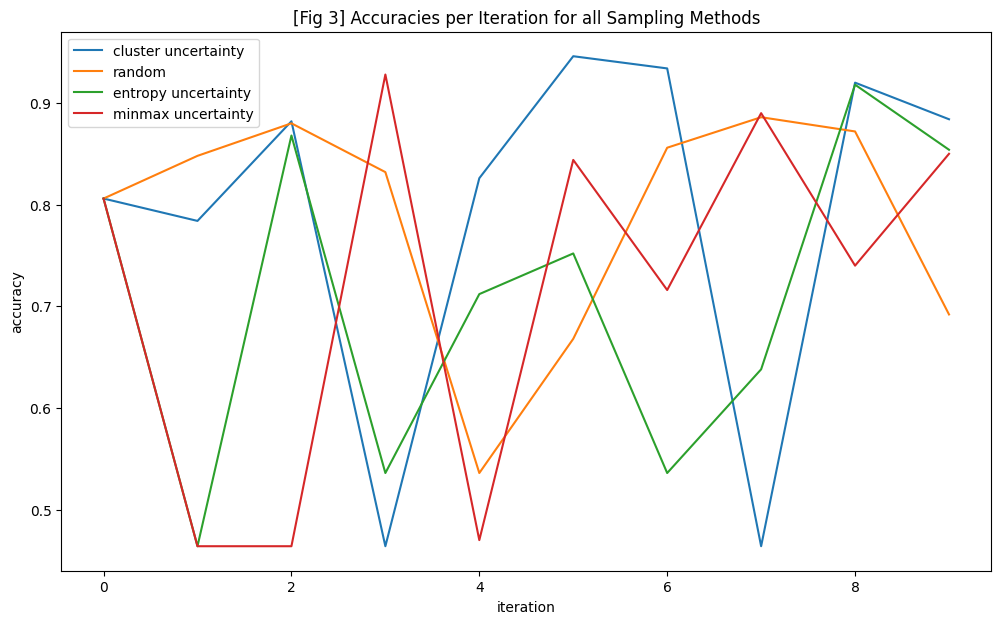

In [ ]:
random_accuracies = [0.806, 0.848, 0.88, 0.832, 0.536, 0.668, 0.856, 0.886, 0.872, 0.692]
entropy_uncertainty_accuracies = [0.806, 0.464, 0.868, 0.536, 0.712, 0.752, 0.536, 0.638, 0.918, 0.854]
minmax_uncertainty_accuracies = [0.806, 0.464, 0.464, 0.928, 0.47, 0.844, 0.716, 0.89, 0.74, 0.85]

plt.figure(figsize=(12, 7))
plt.plot(range(10), cluster_uncertainty_accuracies, label="cluster uncertainty")
plt.plot(range(10), random_accuracies, label="random")
plt.plot(range(10), entropy_uncertainty_accuracies, label="entropy uncertainty")
plt.plot(range(10), minmax_uncertainty_accuracies, label="minmax uncertainty")
plt.title("[Fig 3] Accuracies per Iteration for all Sampling Methods")
plt.xlabel("iteration")
plt.ylabel("accuracy")
plt.legend(loc="upper left")
plt.show()

#### **TPR and TNR**

Now, let us copy the TPR results across all iterations, from all ```performance_analysis - <sampling_method>.txt``` files, and paste into the following lists (respective to the sampling method):

In [ ]:
cluster_uncertainty_tpr_lst = [0.931, 1.0, 1.0, 1.0, 0.591, 0.966, 0.888, 0.647, 0.875, 0.534]
random_tpr_lst = [0.931, 0.939, 1.0, 0.647, 0.978, 0.819, 0.832, 0.349, 0.987, 0.746]
entropy_uncertainty_tpr_lst = [0.931, 0.966, 0.931, 0.0, 0.978, 0.939, 0.0, 0.754, 0.996, 0.767]
minmax_uncertainty_tpr_lst = [0.931, 1.0, 1.0, 0.862, 0.151, 0.957, 0.948, 0.970, 0.724, 0.866]

Display the results:

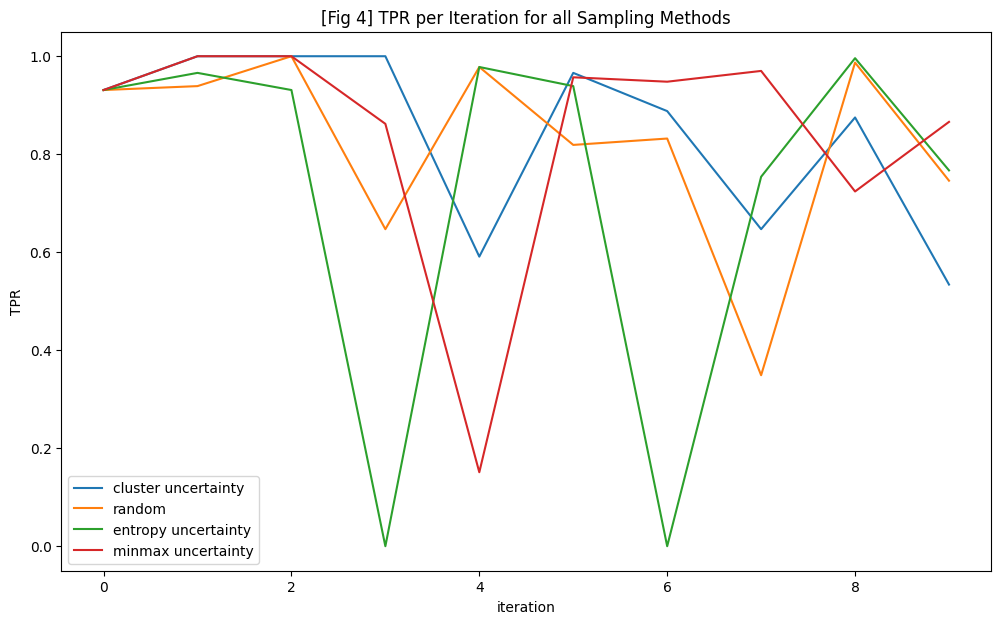

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(range(10), cluster_uncertainty_tpr_lst, label="cluster uncertainty")
plt.plot(range(10), random_tpr_lst, label="random")
plt.plot(range(10), entropy_uncertainty_tpr_lst, label="entropy uncertainty")
plt.plot(range(10), minmax_uncertainty_tpr_lst, label="minmax uncertainty")

plt.title("[Fig 4] TPR per Iteration for all Sampling Methods")
plt.xlabel("iteration")
plt.ylabel("TPR")
plt.legend()
plt.show()

Now, let us copy the TNR results across all iterations, from all ```performance_analysis - <sampling_method>.txt``` files, and paste into the following lists (respective to the sampling method):

In [ ]:
cluster_uncertainty_tnr_lst = [0.698, 0.0, 0.045, 0.0, 0.993, 0.750, 0.963, 1.0, 0.989, 1.0]
random_tnr_lst = [0.698, 0.698, 0.0, 0.993, 0.642, 0.974, 0.989, 1.0, 0.496, 0.989]
entropy_uncertainty_tnr_lst = [0.698, 0.690, 0.922, 1.0, 0.713, 0.925, 1.0, 0.993, 0.149, 0.996]
minmax_uncertainty_tnr_lst = [0.698, 0.0, 0.004, 0.967, 1.0, 0.806, 0.840, 0.769, 0.996, 0.970]

Display the results:

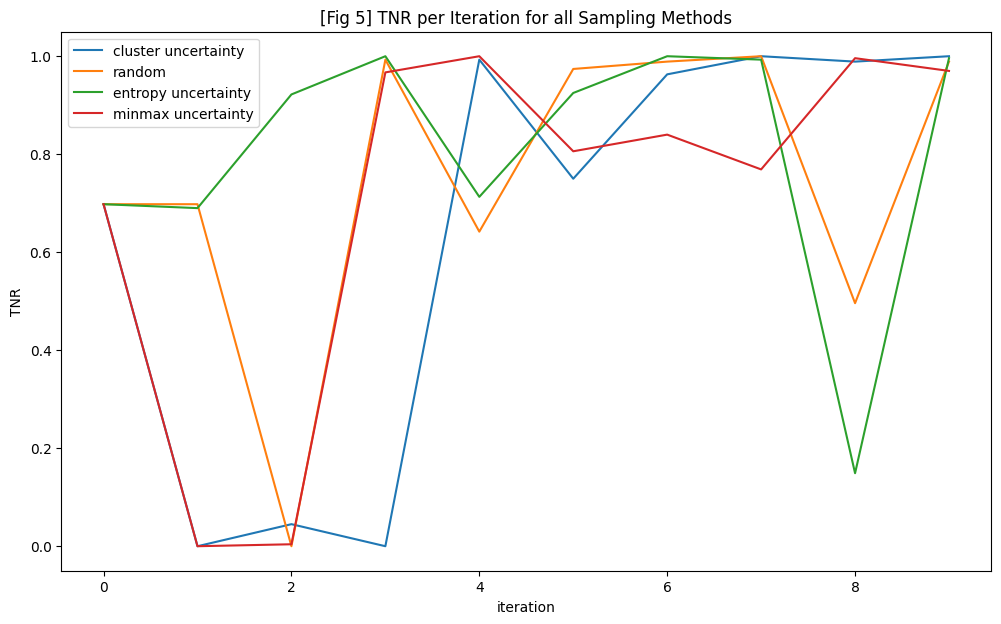

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(range(10), cluster_uncertainty_tnr_lst, label="cluster uncertainty")
plt.plot(range(10), random_tnr_lst, label="random")
plt.plot(range(10), entropy_uncertainty_tnr_lst, label="entropy uncertainty")
plt.plot(range(10), minmax_uncertainty_tnr_lst, label="minmax uncertainty")

plt.title("[Fig 5] TNR per Iteration for all Sampling Methods")
plt.xlabel("iteration")
plt.ylabel("TNR")
plt.legend()
plt.show()

### **Evaluation Metrics Iteration 5**

In this section, we focus on iteration 5 when evaluating the methods, using the following evaluation metrics:

- Confusion matrix

- TPR and TNR

- F1 score

#### **Confusion Matrix**

Let us copy the TP, FP, TN, FN results in **iteration 5**, from all ```performance_analysis - <sampling_method>.txt``` files, and paste into the following lists below (respective to the sampling method).

Note that we created the confusion matrix as follows:

|  |     |     |
|--|-----|-----|
|  | TN  | FP  |
|  | FN  | TP  |

In [ ]:
# define confusion matrix for all sampling methods
cluster_uncertainty_cm = np.array([[201, 67], [8, 224]])
random_cm = np.array([[261, 7], [42, 190]])
entropy_uncertainty_cm = np.array([[248, 20], [14, 218]])
minmax_uncertainty_cm = np.array([[216, 52], [10, 222]])

methods_confusion_matrices = [cluster_uncertainty_cm, random_cm, entropy_uncertainty_cm, minmax_uncertainty_cm]

Display the results:

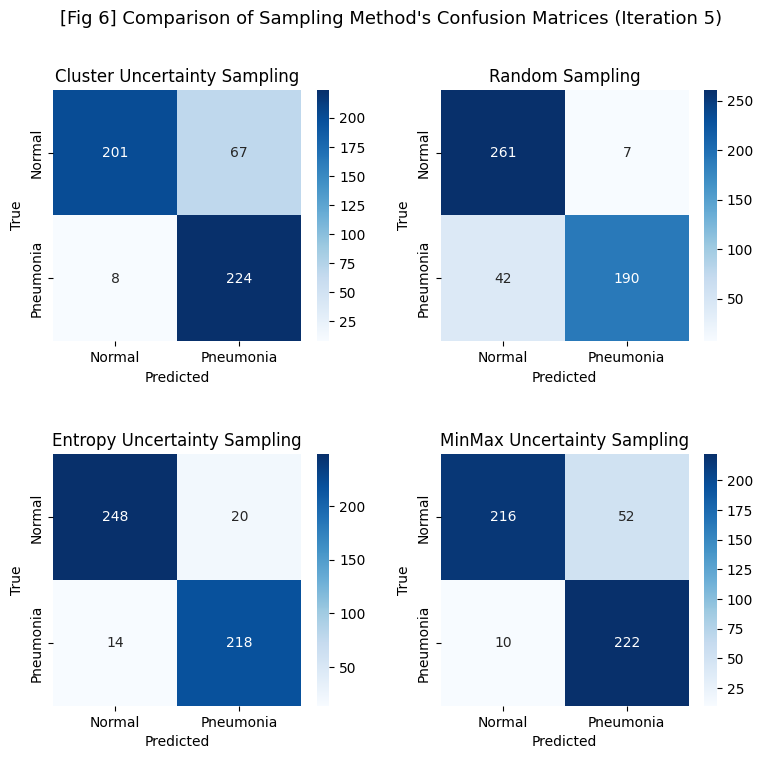

In [ ]:
# plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(9, 8))
fig.suptitle("[Fig 6] Comparison of Sampling Method's Confusion Matrices (Iteration 5)\n", fontsize=13)

for method_num, method_name in enumerate(sampling_methods):
  x, y = method_num // 2, method_num % 2

  sns.heatmap(methods_confusion_matrices[method_num], annot=True, fmt='g', cmap='Blues', ax=axes[x, y])
  axes[x, y].set_title(f'{method_name} Sampling')
  axes[x, y].set_xlabel('Predicted')
  axes[x, y].set_ylabel('True')
  axes[x, y].set_xticklabels(['Normal', 'Pneumonia'])
  axes[x, y].set_yticklabels(['Normal', 'Pneumonia'])

plt.subplots_adjust(hspace=0.45, wspace=0.25)
plt.show()

#### **TPR and TNR**

Let us copy the TPR and TNR results in **iteration 5**, from all ```performance_analysis - <sampling_method>.txt``` files, and paste into the following lists below (respective to the sampling method):

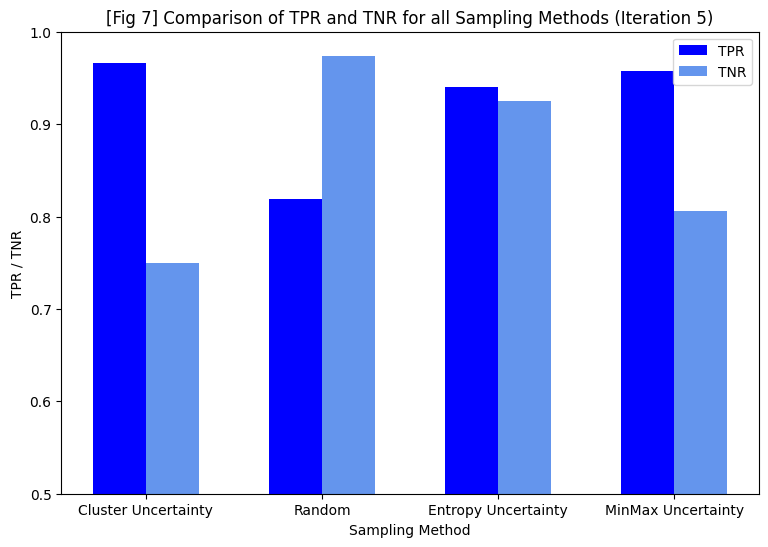

In [5]:
TPR_lst = [0.966, 0.819, 0.94, 0.957]
TNR_lst = [0.75, 0.974, 0.925, 0.806]

# plot results
fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(len(TPR_lst))
width = 0.3

ax.bar(x - width/2, TPR_lst, width, label='TPR', color='blue')
ax.bar(x + width/2, TNR_lst, width, label='TNR', color='cornflowerblue')

# add details
ax.set_xlabel('Sampling Method')
ax.set_ylabel('TPR / TNR')
ax.set_title('[Fig 7] Comparison of TPR and TNR for all Sampling Methods (Iteration 5)')
ax.set_xticks(x)
ax.set_xticklabels(['Cluster Uncertainty', 'Random', 'Entropy Uncertainty', 'MinMax Uncertainty'])  # Custom labels for each pair
ax.set_ylim(0.5, 1)
ax.legend()

plt.show()

#### **F1 Score**

Lastly, let us copy the F1 score results in **iteration 5**, from all ```performance_analysis - <sampling_method>.txt``` files, and paste into the following lists below (respective to the sampling method):

In [ ]:
f1_score_lst = [0.8566, 0.8858, 0.9277, 0.8775]

Display the results:

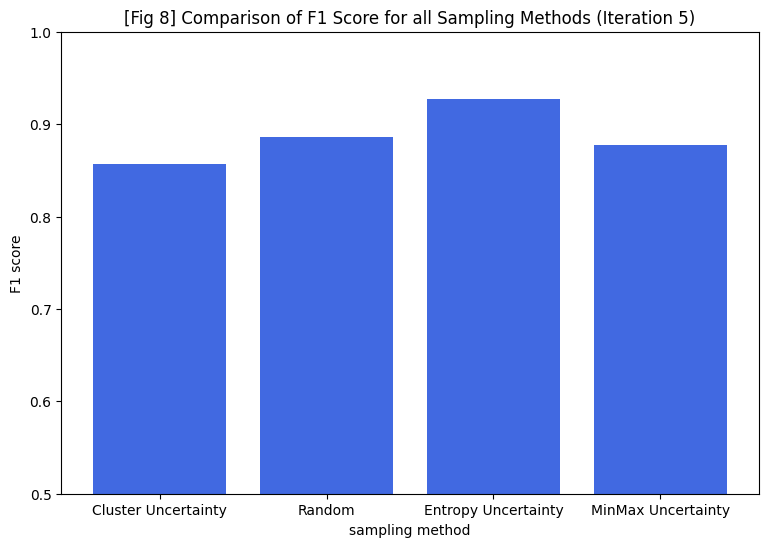

In [ ]:
plt.figure(figsize=(9, 6))
plt.bar(sampling_methods, f1_score_lst, color="royalblue")
plt.title("[Fig 8] Comparison of F1 Score for all Sampling Methods (Iteration 5)")
plt.xlabel("sampling method")
plt.ylabel("F1 score")
plt.ylim(0.5, 1)
plt.show()